In [14]:
%matplotlib inline


Group analysis of resting-state fMRI with ICA: CanICA
=====================================================

An example applying CanICA to resting-state data. This example applies it
to 30 subjects of the ADHD200 datasets. Then it plots a map with all the
components together and an axial cut for each of the components separately.

CanICA is an ICA method for group-level analysis of fMRI data. Compared
to other strategies, it brings a well-controlled group model, as well as a
thresholding algorithm controlling for specificity and sensitivity with
an explicit model of the signal. The reference papers are:

    * G. Varoquaux et al. "A group model for stable multi-subject ICA on
      fMRI datasets", NeuroImage Vol 51 (2010), p. 288-299

    * G. Varoquaux et al. "ICA-based sparse features recovery from fMRI
      datasets", IEEE ISBI 2010, p. 1177

Pre-prints for both papers are available on hal
(http://hal.archives-ouvertes.fr)

<div class="alert alert-info"><h4>Note</h4><p>The use of the attribute `components_img_` from decomposition
    estimators is implemented from version 0.4.1.
    For older versions, unmask the deprecated attribute `components_`
    to get the components image using attribute `masker_` embedded in
    estimator.
    See the `section Inverse transform: unmasking data <unmasking_step>`.</p></div>



First we load the ADHD200 data
-------------------------------



In [15]:
import os

func_filenames=[]
for x in os.listdir('/home/share/TmpData/Qinglin/HCP_Motor'):
    #print(x)
    file='/home/share/TmpData/Qinglin/HCP_Motor/'+str(x)+'/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz'
    #file="/srv1/HCP_4mm/"+str(x)+"/MNINonLinear/Results/tfMRI_EMOTION_LR/tfMRI_EMOTION_LR_hp200_s4.feat/filtered_func_data.nii.gz"   
    if os.path.isfile(file):
        func_filenames.append(file)    
print func_filenames


from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

['/home/share/TmpData/Qinglin/HCP_Motor/149842/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/183337/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/181636/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/751348/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/102816/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/179548/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/268749/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/686969/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/170631/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz', '/home/share/TmpData/Qinglin/HCP_Motor/144125

Here we apply CanICA on the data
---------------------------------



In [17]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=40, mask=mask_img, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0,n_jobs=8)
data=canica.prepare_data(func_filenames, reduction_ratio=0.02)
print(data.shape)

import numpy as np
np.save('/home/share/TmpData/Qinglin/HCP_Group/Motor900.npy', data)

canica._raw_fit(data)
# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
(5106, 228453)
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[-0.000749, ...,  0.006481],
       ...,
       [ 0.00085 , ...,  0.000191]], dtype=float32), n_iter=3, random_state=0, transpose=True, n_components=40)


/home/uga_qinglin/Documents/nilearn-deep/nilearn/decomposition/multi_pca.py:171: UserWarning: Persisting input arguments took 6.22s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  random_state=self.random_state, n_iter=3)


__________________________________________________randomized_svd - 38.4s, 0.6min


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:  1.6min remaining:  3.7min
[Parallel(n_jobs=8)]: Done   5 out of  10 | elapsed:  2.0min remaining:  2.0min
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:  2.2min remaining:   55.5s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:  3.2min finished
/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IOError: [Errno 28] No space left on device

In [ ]:
task=['EMOTION','RELATIONAL','SOCIAL','WM','GAMBLING','LANGUAGE']

from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

import os
cache='/home/share/TmpData/Qinglin/nilearn_cache'
if not os.path.exists(cache):
    os.makedirs(cache)
    
from nilearn.decomposition import CanICA
for t in task:
    print t
    func_filenames=[]
    for x in os.listdir('/home/share/TmpData/Qinglin/HCP_Motor'):
        file='/home/share/TmpData/Qinglin/HCP_Motor/'+str(x)+'/MNINonLinear/Results/tfMRI_'+str(t)+'_LR/tfMRI_'+str(t)+'_LR.nii.gz'
        #print file
        if os.path.isfile(file):
            func_filenames.append(file)   
    func_filenames=func_filenames[:1]
    canica = CanICA(n_components=40, mask=mask_img, smoothing_fwhm=6.,
                memory="/home/share/TmpData/Qinglin/nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0,n_jobs=8)
    data=canica.prepare_data(func_filenames, reduction_ratio=0.2)
    print(data.shape)

    import numpy as np
    np.save('/home/share/TmpData/Qinglin/HCP_Group/'+t+'100_0.2.npy', data)
    del canica
    import shutil
    shutil.rmtree('/home/share/TmpData/Qinglin/nilearn_cache')
        


EMOTION
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
(36, 228453)
RELATIONAL
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
(47, 228453)
SOCIAL
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data


To visualize we plot the outline of all components on one figure
-----------------------------------------------------------------



The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


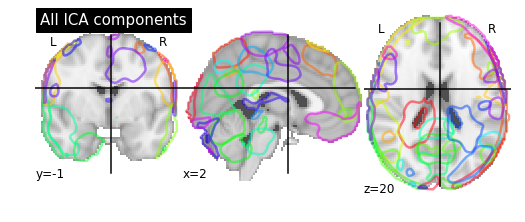

In [18]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')

Finally, we plot the map for each ICA component separately
-----------------------------------------------------------



/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`ma

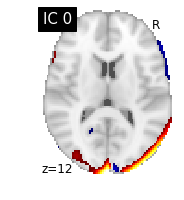

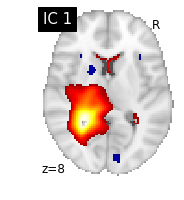

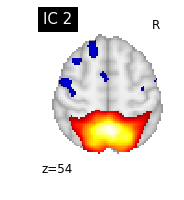

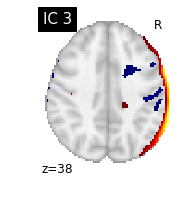

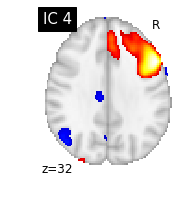

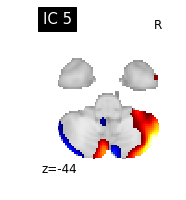

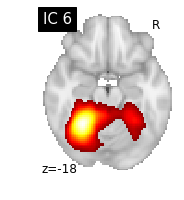

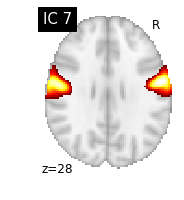

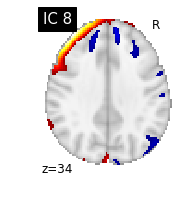

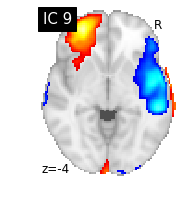

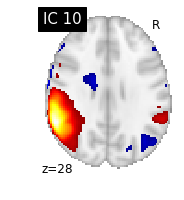

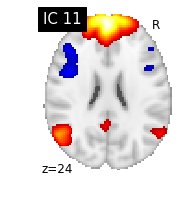

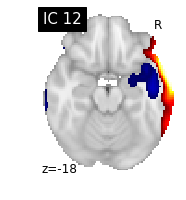

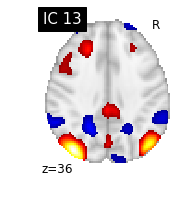

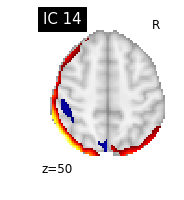

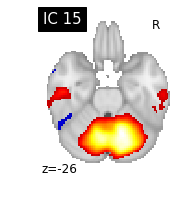

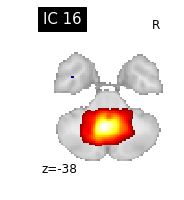

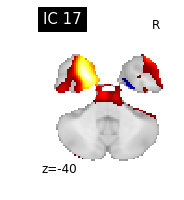

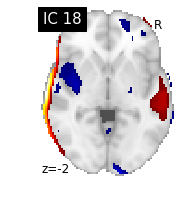

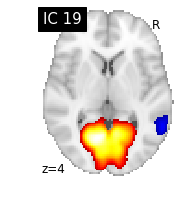

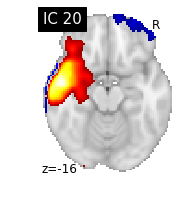

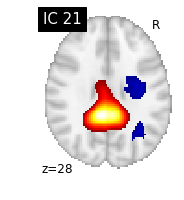

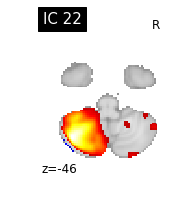

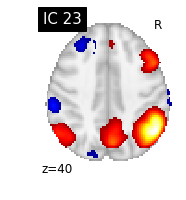

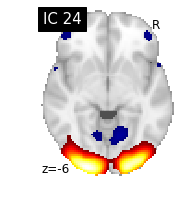

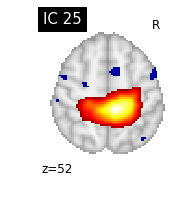

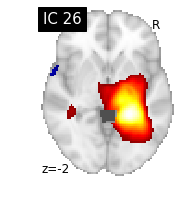

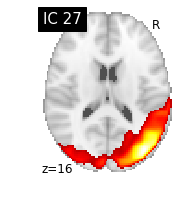

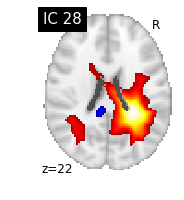

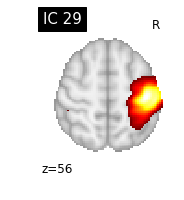

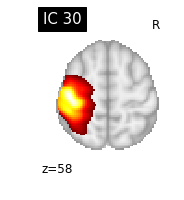

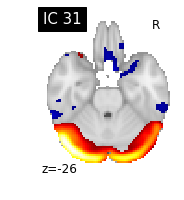

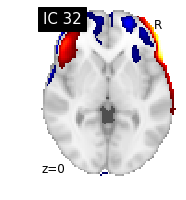

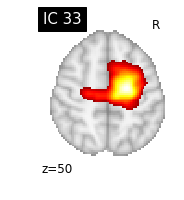

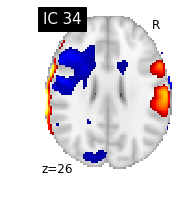

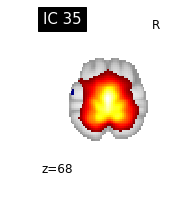

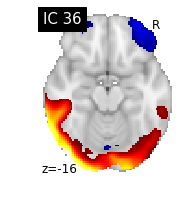

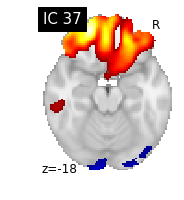

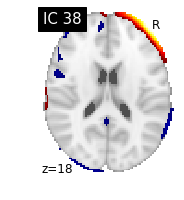

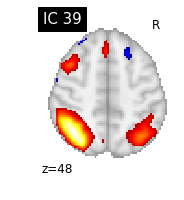

In [19]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()